<a href="https://colab.research.google.com/github/victorluis22/metodos-numericos-otimizacao/blob/main/simplexNelderMeadipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import math

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def f(function, x):
  x1 = x[0]
  x2 = x[1]
  return eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)


In [90]:
def plot3D(function, minimun, range=5):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    
    ax.scatter(minimun[0], minimun[1], color='red', label=f'Mínimo')

def plotContour(function, minimun, triangles, range=5):
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2}, ALLOWED_NAMES)

    ax.contour(x1, x2, z, colors='blue')

    
    for triangle in triangles:
        x, y = [], []
        for point in triangle:
            ax.scatter(point[0], point[1], color='green', label=f'Mínimo')
            x.append(point[0])
            y.append(point[1])
            ax.fill(x, y, facecolor='none', edgecolor='purple')

    ax.scatter(minimun[0], minimun[1], color='red', label=f'Mínimo')

    plt.show()


Iteração 0==========================
Pontos: [[ 5 10]
 [10  5]
 [ 0  5]]
f(x) dos vertices: [200, 425, 25]
Melhor vertice: vertices[2] = 25
Vertice Neutro: vertices[0] = 200
Pior vertice: vertices[1] = 425
Centroid: [2.5 7.5]

Iteração 1==========================
Pontos: [[ 5 10]
 [-1  8]
 [ 0  5]]
f(x) dos vertices: [200, 68, 25]
Melhor vertice: vertices[2] = 25
Vertice Neutro: vertices[1] = 68
Pior vertice: vertices[0] = 200
Centroid: [-0.5  6.5]

Iteração 2==========================
Pontos: [[-3  4]
 [-1  8]
 [ 0  5]]
f(x) dos vertices: [52, 68, 25]
Melhor vertice: vertices[2] = 25
Vertice Neutro: vertices[0] = 52
Pior vertice: vertices[1] = 68
Centroid: [-1.5  4.5]

Iteração 3==========================
Pontos: [[-3  4]
 [-2  1]
 [ 0  5]]
f(x) dos vertices: [52, 17, 25]
Melhor vertice: vertices[1] = 17
Vertice Neutro: vertices[2] = 25
Pior vertice: vertices[0] = 52
Centroid: [-1.  3.]

Iteração 4==========================
Pontos: [[ 1  2]
 [-2  1]
 [ 0  5]]
f(x) dos vertices: [8, 1

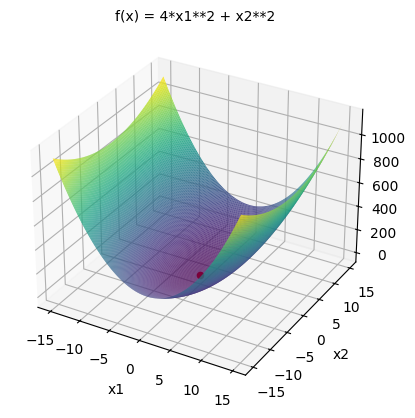

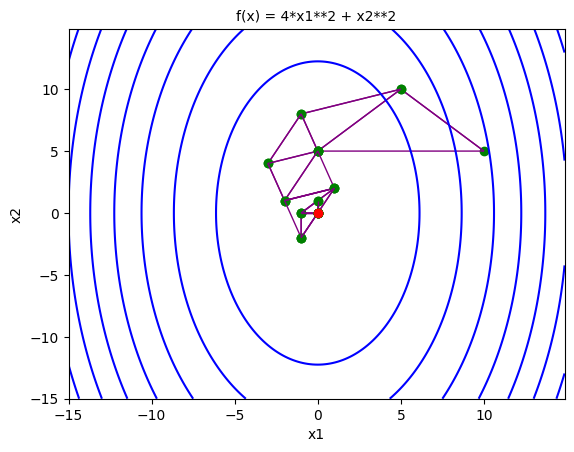

In [91]:
def nelderMeadSimplex (function, x, y, z, dim):
  e = 1e-6
  time = 0
  timeout = 100
  triangles = []
  points = np.array([x, y, z])
  c, ic, p, oc, r, ex = -1, -0.5, 0, 0.5, 1, 2

  while time < timeout:
    triangles.append(np.copy(points))
    vertices = [f(function, points[0]), f(function, points[1]), f(function, points[2])]
    
    bestIndex = vertices.index(min(vertices))
    worstIndex = vertices.index(max(vertices))
    neutralIndex = [i for i in range(len(vertices)) if i != bestIndex and i != worstIndex][0]

    print(f'\nIteração {time}==========================')
    print(f'Pontos: {points}')
    print(f'f(x) dos vertices: {vertices}')
    print(f'Melhor vertice: vertices[{bestIndex}] = {vertices[bestIndex]}')
    print(f'Vertice Neutro: vertices[{neutralIndex}] = {vertices[neutralIndex]}')
    print(f'Pior vertice: vertices[{worstIndex}] = {vertices[worstIndex]}')

    centroid = np.array([0,0])
    for i, point in enumerate(points):
      if i != worstIndex:
        centroid += point

    centroid = centroid/(len(points)-1)

    print (f'Centroid: {centroid}')

    if vertices[worstIndex] - vertices[bestIndex] < e:
      break

    xr = ((1 + r) * centroid) - (r * points[worstIndex])
    fr = f(function, xr)

    # Reflection
    if vertices[bestIndex] <= fr and fr < vertices[neutralIndex]:
      points[worstIndex] = xr
    # Expansion
    elif fr < vertices[bestIndex]:
      xex = ((1 + ex) * centroid) - (ex * points[worstIndex])
      fex = f(function, xex)

      if fex < fr:
        points[worstIndex] = xex
      else:
        points[worstIndex] = xr
    # External Contraction
    elif vertices[neutralIndex] <= fr < vertices[worstIndex]:
      xoc = ((1 + oc) * centroid) - (oc * points[worstIndex])
      foc = f(function, xoc)

      if foc < fr:
        points[worstIndex] = xoc
    # Internal Contraction
    elif fr >= vertices[worstIndex]:
      xic = ((1 + ic) * centroid) - (ic * points[worstIndex])
      fic = f(function, xic)

      if fic < fr:
        points[worstIndex] = xic

    time += 1

  return [time, triangles, points[bestIndex]]


function = "4*x1**2 + x2**2"
[time, triangles, minimun]= nelderMeadSimplex(function, [5,10], [10, 5], [0, 5], 2)

print(minimun)

plot3D(function, minimun, 15)
plotContour(function, minimun, triangles, 15)
